In [ ]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import pingouin
import scipy.stats as stats

In [ ]:
# read women_results data
women_results = pd.read_csv('women_results.csv', parse_dates = ["date"], index_col = 0)

# read men_results data
men_results = pd.read_csv('men_results.csv', parse_dates = ["date"], index_col = 0)

In [ ]:
women_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4884 entries, 0 to 4883
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        4884 non-null   datetime64[ns]
 1   home_team   4884 non-null   object        
 2   away_team   4884 non-null   object        
 3   home_score  4884 non-null   int64         
 4   away_score  4884 non-null   int64         
 5   tournament  4884 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 267.1+ KB


In [ ]:
men_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44353 entries, 0 to 44352
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        44353 non-null  datetime64[ns]
 1   home_team   44353 non-null  object        
 2   away_team   44353 non-null  object        
 3   home_score  44353 non-null  int64         
 4   away_score  44353 non-null  int64         
 5   tournament  44353 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 2.4+ MB


In [ ]:
# check the number of rows and columns
print(women_results.shape)
print(men_results.shape)

(4884, 6)
(44353, 6)


In [ ]:
# check the data types
print(women_results.dtypes)
print(men_results.dtypes)

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
dtype: object
date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
dtype: object


In [ ]:
# filter the data to only include official FIFA World Cup matches that took place after 2002-01-01
women_sub = women_results[(women_results['tournament'] == 'FIFA World Cup') & (women_results['date'] > '2002-01-01')]

men_sub = men_results[(men_results['tournament'] == 'FIFA World Cup') & (men_results['date'] > '2002-01-01')]

In [ ]:
# check the number of rows and columns of the subset dataframes
print(women_sub.shape)
print(men_sub.shape)

(200, 6)
(384, 6)


In [ ]:
# create new 'total_score' and 'gender' columns
women_sub['total_score'] = women_sub['home_score'] + women_sub['away_score']
women_sub['gender'] = "women"

# for men
men_sub['total_score'] = men_sub['home_score'] + men_sub['away_score']
men_sub['gender'] = "men"

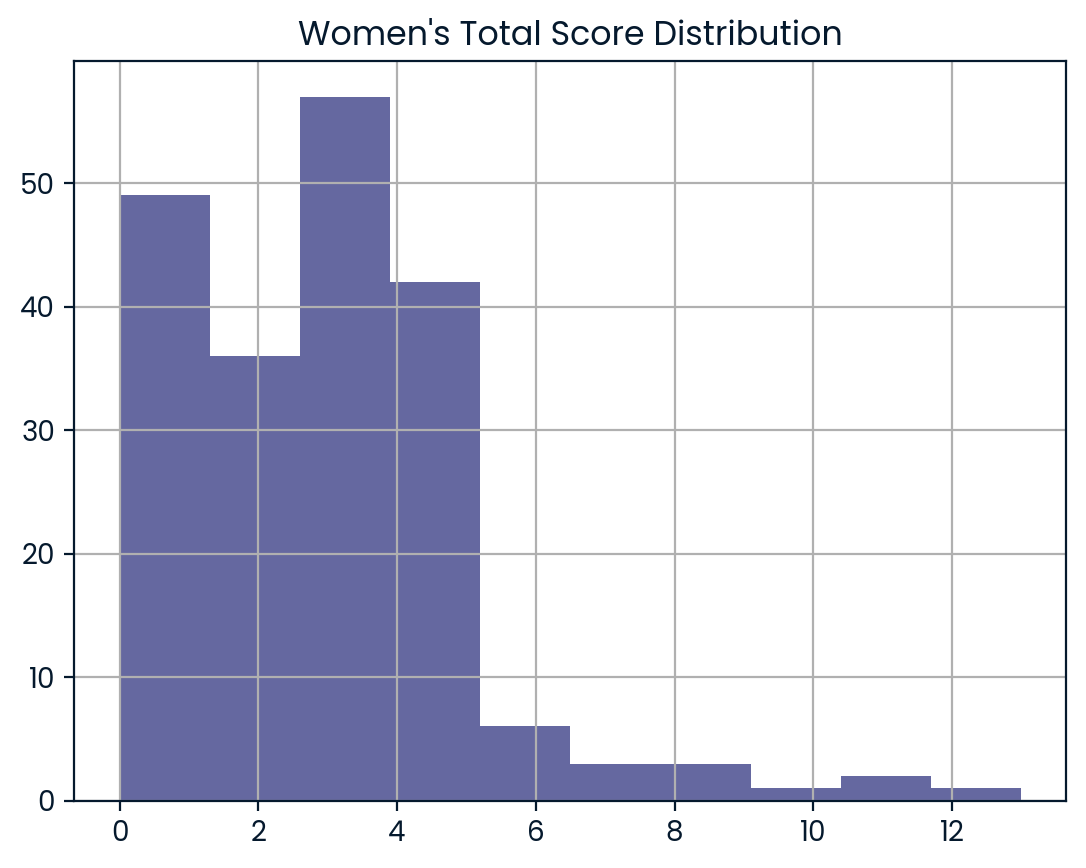

In [ ]:
# Check Women's total score distribution
women_sub['total_score'].hist()
plt.title("Women's Total Score Distribution")
plt.show()

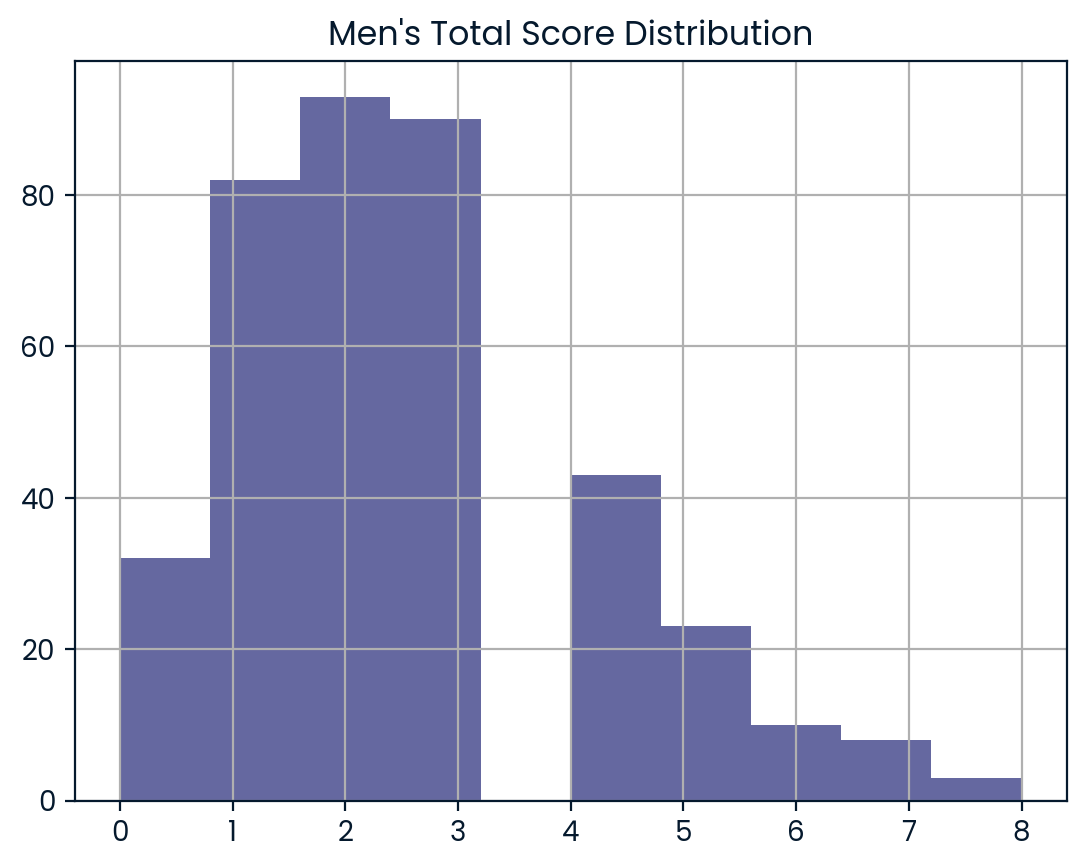

In [ ]:
# Check Men's total score distribution
men_sub['total_score'].hist()
plt.title("Men's Total Score Distribution")
plt.show()

In [ ]:
# concatenate dataframes
combine_data = pd.concat([women_sub, men_sub], ignore_index = True)
combine_data.head()

,date,home_team,away_team,home_score,away_score,tournament,total_score,gender
0,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,3,women
1,2003-09-20,Norway,France,2,0,FIFA World Cup,2,women
2,2003-09-20,Germany,Canada,4,1,FIFA World Cup,5,women
3,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,6,women
4,2003-09-21,United States,Sweden,3,1,FIFA World Cup,4,women


In [ ]:
# check the mean of the total scores by gender
combine_data.groupby('gender')['total_score'].mean()

gender
men      2.513021
women    2.980000
Name: total_score, dtype: float64

In [ ]:
# subset the data
combine_data = combine_data[['total_score', 'gender']]

# to conduct the Wilcoxon-Mann-Whitney test, convert the data from long to wide format
combine_data_wide = combine_data.pivot(values = "total_score", columns = "gender")
combine_data_wide.head()

gender,men,women
0,NaN,3.0
1,NaN,2.0
2,NaN,5.0
3,NaN,6.0
4,NaN,4.0


In [ ]:
# perform the Wilcoxon-Mann-Whitney test
result_pingouin = pingouin.mwu(x=combine_data_wide['women'],
y=combine_data_wide['men'],
alternative='greater')
print(result_pingouin)

       U-val alternative     p-val       RBC      CLES
MWU  43273.0     greater  0.005107 -0.126901  0.563451


In [ ]:
# Extracting the p-value using pingouin
p_val = result_pingouin['p-val'].values[0].round(6)
p_val

0.005107

In [ ]:
# determining the result from the p-value and significance level
alpha = 0.1
if p_val <= alpha:
    result = "reject"
else:
    result = "fail to rejct"

result_dict = {"p_val": p_val, "result": result}
result_dict

{'p_val': 0.005107, 'result': 'reject'}

In [ ]:
# Prepare the data to perform the hypothesis test using SciPy
women_scores = combine_data_wide['women'].dropna()
men_scores = combine_data_wide['men'].dropna()

# Perform the Mann-Whitney U test using SciPy
statistic, p_value = stats.mannwhitneyu(women_scores, men_scores, alternative='greater')

# Extracting the p-value using SciPy
print('P-value:', p_value)

P-value: 0.005106609825443641
